

# <div> <center><b style="color:OrangeRed"> Flight Ticket Price Prediction </b> </center></div>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

<h2>Importing the data sets</h2>

In [2]:
df = pd.read_excel("Data_Flight.xlsx")


# EDA

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Below is the complete report of the dataset , toggle trough the widgets to get the information.

In [4]:
profile=ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

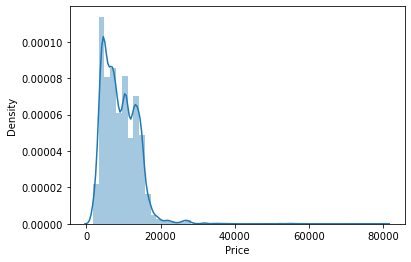

In [5]:

sns.distplot(df['Price'])

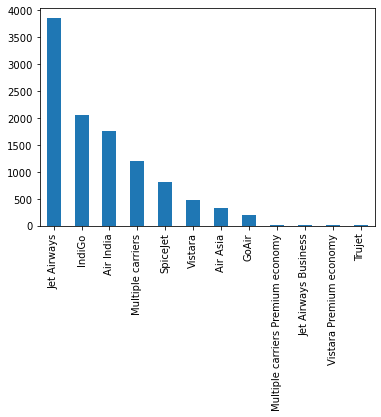

In [6]:
df['Airline'].value_counts().plot(kind='bar');


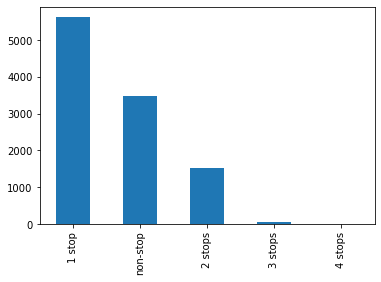

In [7]:
df['Total_Stops'].value_counts().plot(kind='bar');

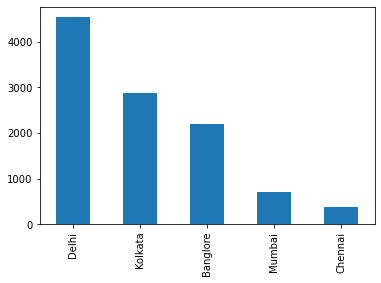

In [8]:
df['Source'].value_counts().plot(kind='bar');

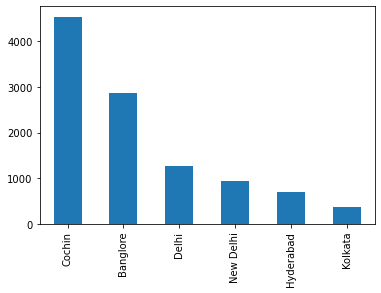

In [9]:
df['Destination'].value_counts().plot(kind='bar');

In [10]:

print(df.shape)

(10683, 11)


<h2>Calculating some statistical data</h2>

In [11]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<h2>Checking the data type of the columns</h2>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Checking for null values


In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Finding the rows that contain these values

In [14]:
print(df[df["Total_Stops"].isnull()])
print(df[df["Route"].isnull()])

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  
        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  


In [15]:
df.dropna(inplace = True)

In [16]:
df.shape
df.isnull().sum() # No Null values now

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering

### The airports in New Delhi and Delhi are the same.

In [17]:
df.replace({"New Delhi": "Delhi"}, inplace = True)

### Extracting Date and Month from Date_of_Journey 

In [18]:
df["Journey_Month"] = pd.to_datetime(df["Date_of_Journey"],format = "%d/%m/%Y").dt.month
df["Journey_Date"] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Date
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [20]:
df.drop(["Date_of_Journey"],axis='columns',inplace=True) # Dropping the column "Date_of_Journey"

In [21]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Date
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


### Extracting Hour  and Minutes from Arrival_Time

In [22]:
df["Arrival_hour"] = pd.to_datetime(df['Arrival_Time']).dt.hour
df["Arrival_min"] = pd.to_datetime(df['Arrival_Time']).dt.minute


In [23]:
df.drop(["Arrival_Time"],axis=1,inplace=True) #Dropping the "Arrival_Time" Column

In [24]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Date,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,3,24,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,5,1,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,6,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,5,12,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,3,1,21,35


### Extracting Hour  and Minutes from Dep_Time

In [25]:
df['Dep_hour'] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute


In [26]:
df.drop(['Dep_Time'],axis=1,inplace=True) # #Dropping the "Dep_Time" Column

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Date,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


### Exatracting a new column from 'Duration' column which show Total duration in Minutes

In [28]:
df['Duration_in_Min']=(pd.to_timedelta(df['Duration']).dt.seconds // 60).astype(int)





In [29]:
df.drop(['Duration'],axis=1,inplace=True) # #Dropping the "Duration" Column

In [30]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Date,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_in_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,3,24,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,23,30,18,5,325
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,21,35,16,50,285


### Airline, Source  & Destination are the nominal categorical variables, So converting those to dummy variables.

In [31]:
df.nunique()

Airline              12
Source                5
Destination           5
Route               128
Total_Stops           5
Additional_Info      10
Price              1870
Journey_Month         4
Journey_Date         10
Arrival_hour         24
Arrival_min          12
Dep_hour             24
Dep_min              12
Duration_in_Min     284
dtype: int64

In [32]:
Airline = pd.get_dummies(df[["Airline"]],drop_first=True)
Source = pd.get_dummies(df[["Source"]],drop_first=True)
Destination = pd.get_dummies(df[["Destination"]],drop_first=True)

In [33]:
Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [34]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [35]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


 ### <font color="red"> Note - Originally Airlines, Source & Destination had 12, 6 & 5 unique values but data frame we are getting have 1 less column for each of them because "drop_first=True" and that is used to avoid "Dummy Trap"/ multicollinearity. </font>

## Merging all the data frames 


In [36]:
df= pd.concat([df, Airline,Source,Destination],axis=1)

In [37]:
df.shape

(10682, 33)

In [38]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Date,Arrival_hour,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,3,24,1,...,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,...,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,...,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,23,...,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,21,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,22,...,0,0,0,0,1,0,0,0,0,0
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,4,27,23,...,0,0,0,0,1,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,4,27,11,...,0,0,0,0,0,0,0,1,0,0
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No info,12648,3,1,14,...,1,0,0,0,0,0,0,1,0,0


In [39]:
df.drop(['Airline',"Source","Destination"],axis=1,inplace=True)

In [40]:
df

,Route,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Date,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,BLR → DEL,non-stop,No info,3897,3,24,1,10,22,20,...,0,0,0,0,0,0,0,1,0,0
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,15,5,50,...,0,0,0,0,1,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,25,9,25,...,0,0,0,1,0,0,1,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,5,12,23,30,18,5,...,0,0,0,0,1,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,3,1,21,35,16,50,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,non-stop,No info,4107,4,9,22,25,19,55,...,0,0,0,0,1,0,0,0,0,0
10679,CCU → BLR,non-stop,No info,4145,4,27,23,20,20,45,...,0,0,0,0,1,0,0,0,0,0
10680,BLR → DEL,non-stop,No info,7229,4,27,11,20,8,20,...,0,0,0,0,0,0,0,1,0,0
10681,BLR → DEL,non-stop,No info,12648,3,1,14,10,11,30,...,1,0,0,0,0,0,0,1,0,0


## Manipulating the values of the "Total_Stops" Column

In [41]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [42]:
df

,Route,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Date,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,BLR → DEL,0,No info,3897,3,24,1,10,22,20,...,0,0,0,0,0,0,0,1,0,0
1,CCU → IXR → BBI → BLR,2,No info,7662,5,1,13,15,5,50,...,0,0,0,0,1,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,No info,13882,6,9,4,25,9,25,...,0,0,0,1,0,0,1,0,0,0
3,CCU → NAG → BLR,1,No info,6218,5,12,23,30,18,5,...,0,0,0,0,1,0,0,0,0,0
4,BLR → NAG → DEL,1,No info,13302,3,1,21,35,16,50,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,No info,4107,4,9,22,25,19,55,...,0,0,0,0,1,0,0,0,0,0
10679,CCU → BLR,0,No info,4145,4,27,23,20,20,45,...,0,0,0,0,1,0,0,0,0,0
10680,BLR → DEL,0,No info,7229,4,27,11,20,8,20,...,0,0,0,0,0,0,0,1,0,0
10681,BLR → DEL,0,No info,12648,3,1,14,10,11,30,...,1,0,0,0,0,0,0,1,0,0


In [43]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True) # We see that routes and Total_stops do the same thing

In [44]:
df

,Total_Stops,Price,Journey_Month,Journey_Date,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_in_Min,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,3,24,1,10,22,20,170,0,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,5,1,13,15,5,50,445,1,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,6,9,4,25,9,25,1140,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,5,12,23,30,18,5,325,0,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,3,1,21,35,16,50,285,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,22,25,19,55,150,0,...,0,0,0,0,1,0,0,0,0,0
10679,0,4145,4,27,23,20,20,45,155,1,...,0,0,0,0,1,0,0,0,0,0
10680,0,7229,4,27,11,20,8,20,180,0,...,0,0,0,0,0,0,0,1,0,0
10681,0,12648,3,1,14,10,11,30,160,0,...,1,0,0,0,0,0,0,1,0,0


In [45]:
sorted(df)

['Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Arrival_hour',
 'Arrival_min',
 'Dep_hour',
 'Dep_min',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Duration_in_Min',
 'Journey_Date',
 'Journey_Month',
 'Price',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Total_Stops']

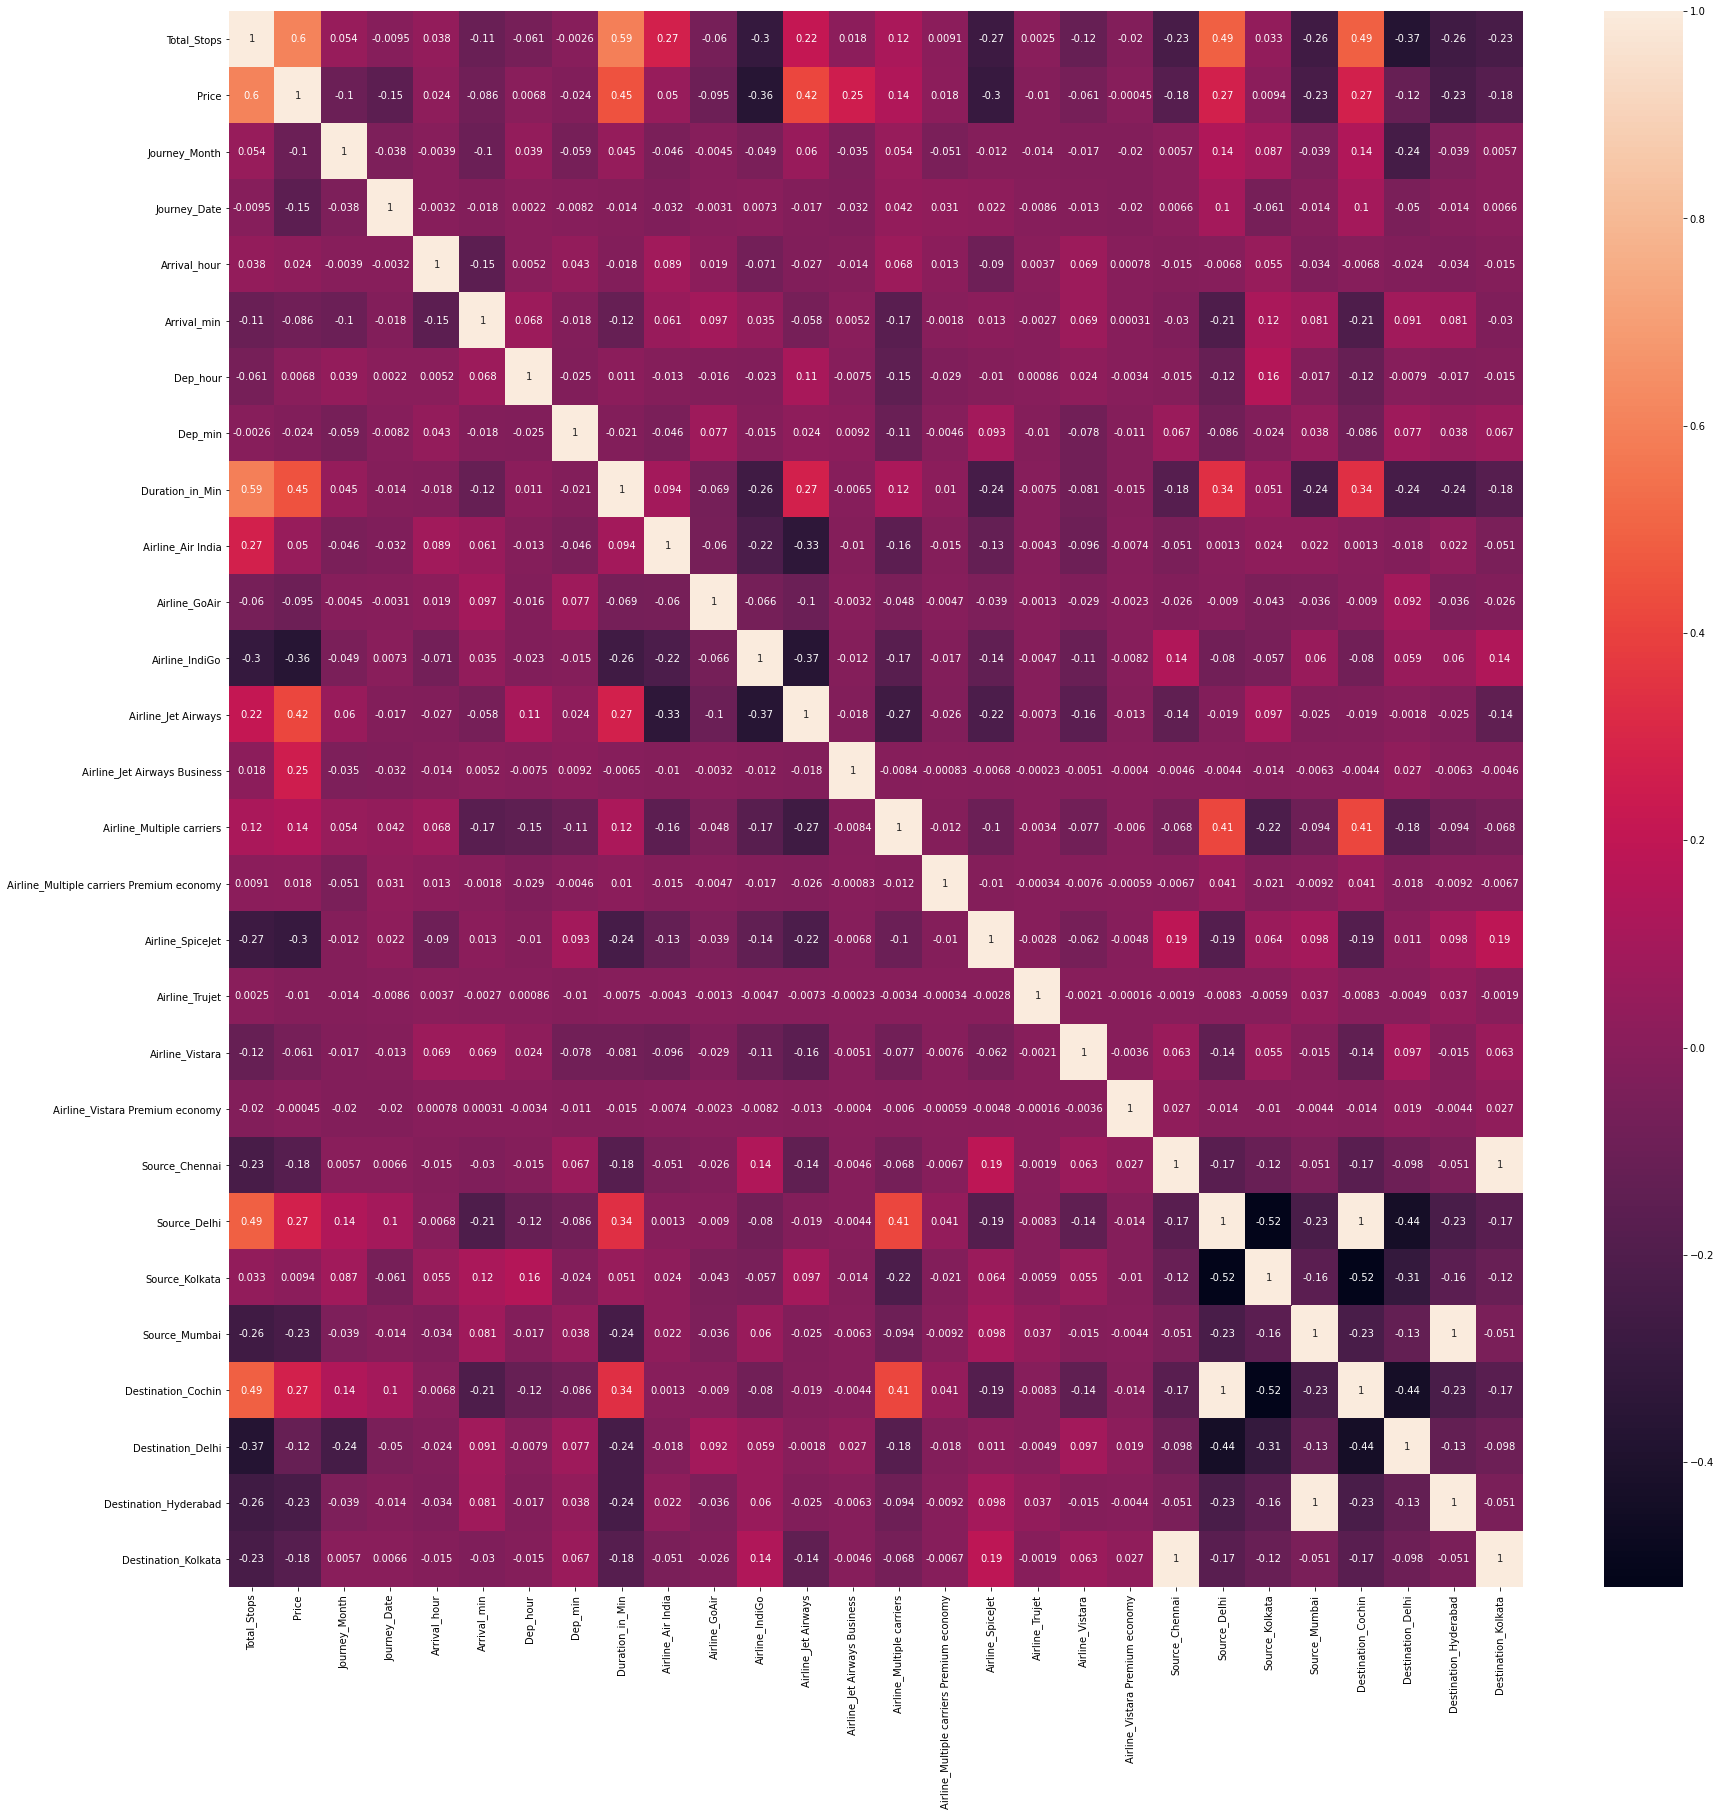

In [46]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize = (29,29))
sns.heatmap(df.corr(), annot = True)

plt.show()

In [47]:
 
X = df.drop(["Price"],axis=1)
y = df["Price"]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [49]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()



In [50]:
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
y_pred = reg_rf.predict(X_test)

In [52]:
y_pred

array([14173.4235    ,  3943.        , 11030.28309524, ...,
       15140.39      , 18826.03      , 12539.77416667])

In [53]:
print(y_test, y_pred)

7400    13344
1753     3943
158     10844
2510     4423
8889    12935
        ...  
8816     4174
9220     8064
109     15129
5763    18275
9842    10539
Name: Price, Length: 2671, dtype: int64 [14173.4235      3943.         11030.28309524 ... 15140.39
 18826.03       12539.77416667]


In [54]:
reg_rf.score(X_test,y_test)

0.826342477861387

# Hyper Parameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 1000]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [56]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [57]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [58]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1100; total time=  12.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1100; total time=  13.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1100; total time=  12.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1100; total time=  12.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1100; total time=  13.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 7, 10, 13, 16, 18, 21,
                                                      24, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              1000],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=42

In [59]:
rf_random.best_params_

{'n_estimators': 1500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 24}

In [60]:
from sklearn.metrics import accuracy_score

model = RandomForestRegressor(n_estimators = 1500,
 min_samples_split = 5,
 min_samples_leaf =  2,
 max_features = 'auto',
 max_depth =  24)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8449718836359787

# Creating a Joblib file for the model

In [61]:
import joblib 

In [62]:
joblib.dump(model,"Flight_Ticket_Prediction_Model")

['Flight_Ticket_Prediction_Model']

In [63]:
model=joblib.load('Flight_Ticket_Prediction_Model')
       

In [81]:
        Airline_Air_India=0
        Airline_GoAir=0
        Airline_IndiGo=0
        Airline_Jet_Airways=0
        Airline_Jet_Airways_Business=0
        Airline_Multiple_carriers=1
        Airline_Multiple_carriers_Premium_economy=0
        Airline_SpiceJet=0
        Airline_Trujet=0
        Airline_Vistara=0
        Airline_Vistara_Premium_economy=0
        Arrival_hour=19
        Arrival_min=10
        Dep_hour=9
        Dep_min=50
        Destination_Cochin=1
        Destination_Delhi=0
        Destination_Hyderabad=0
        Destination_Kolkata=0
        Duration_in_Min=560
        Journey_Date=6
        Journey_Month=3
        Source_Chennai=0
        Source_Delhi=1
        Source_Kolkata=0
        Source_Mumbai=0
        Total_Stops=1

In [82]:
 y_pred_single = model.predict([[Total_Stops,
        Journey_Month,
        Journey_Date,
        Arrival_hour,
        Arrival_min,
        Dep_hour,
        Dep_min,
        Duration_in_Min,
        Airline_Air_India,
        Airline_GoAir,
        Airline_IndiGo,
        Airline_Jet_Airways,
        Airline_Jet_Airways_Business,
        Airline_Multiple_carriers,
        Airline_Multiple_carriers_Premium_economy,
        Airline_SpiceJet,
        Airline_Trujet,
        Airline_Vistara,
        Airline_Vistara_Premium_economy,
        Source_Chennai,
        Source_Delhi,
        Source_Kolkata,
        Source_Mumbai,
        Destination_Cochin,
        Destination_Delhi,
        Destination_Hyderabad,
        Destination_Kolkata]])

In [83]:
y_pred_single

array([13910.34741258])